In [1]:
import os, sys, pathlib
os.chdir('/home/njm2149/Documents/datajoint-churchland/churchland_pipeline/users/njm2149')
sys.path.insert(0, str(pathlib.Path(os.getcwd()).parents[2]))
sys.path.insert(0, str(pathlib.Path(os.getcwd()).parents[2]) + '/brPY/')
import datajoint as dj
from churchland_pipeline_python import action, acquisition, equipment, lab, processing, reference
from churchland_pipeline_python.utilities import speedgoat, datasync, datajoint_utils as dju
from churchland_pipeline_python.tasks.pacman import pacman_acquisition, pacman_processing
images_path = '/home/njm2149/Documents/datajoint-churchland/churchland_pipeline/images/'

Connecting ChurchlandLab_test@s1n4.u19motor.zi.columbia.edu:3306


In [2]:
import re, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from brpylib import NsxFile, brpylib_ver
from itertools import compress, chain
from functools import reduce
import warnings
import timeit

%load_ext autoreload
%autoreload 2

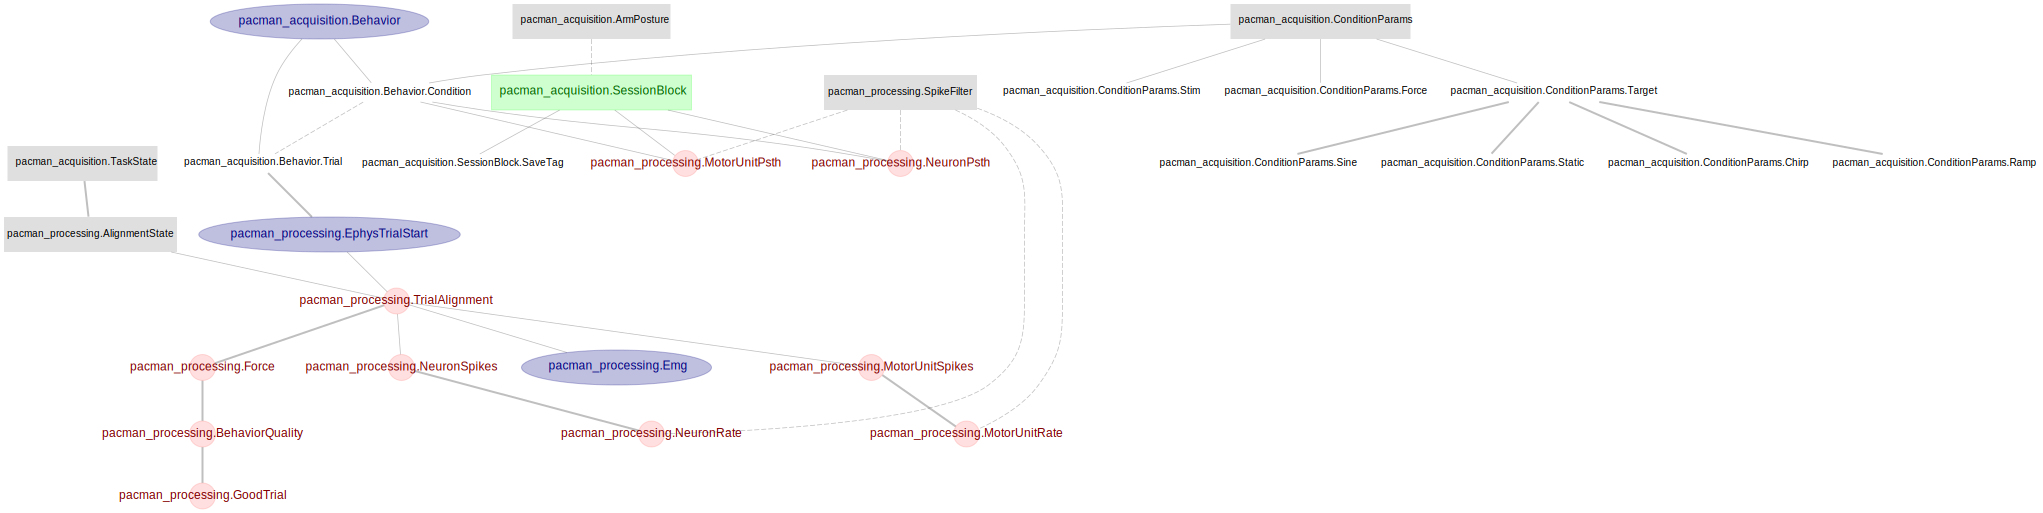

In [3]:
dj.ERD(pacman_acquisition) + dj.ERD(pacman_processing)

In [4]:
acquisition.EphysRecording()

session_date session date,monkey unique monkey name,ephys_file_id file ID,ephys_file_path file path (temporary until issues with filepath attribute are resolved),ephys_sample_rate sampling rate for ephys data [Hz],ephys_duration recording duration [sec]
2018-10-02,Cousteau,0,/srv/locker/churchland/Jumanji/pacman-task/cousteau/raw/2018-10-02/blackrock/pacman-task_c_181002_emg_001.ns5,30000,2940.141
2019-01-30,Cousteau,0,/srv/locker/churchland/Jumanji/pacman-task/cousteau/raw/2019-01-30/blackrock/pacman-task_c_190130_emg_001.ns5,30000,2438.203
2019-09-11,Cousteau,0,/srv/locker/churchland/Jumanji/pacman-task/cousteau/raw/2019-09-11/blackrock/pacman-task_c_190911_emg_001.ns5,30000,7117.705
2019-12-16,Cousteau,0,/srv/locker/churchland/Jumanji/pacman-task/cousteau/raw/2019-12-16/blackrock/pacman-task_c_191216_neu_emg_001.ns6,30000,7449.0136


In [ ]:
key = (pacman_acquisition.Behavior.Condition & (pacman_acquisition.Behavior.Trial & {'session_date':'2018-10-02','trial_number':10})).fetch1('KEY')

In [ ]:
(pacman_acquisition.Behavior.Trial & {'session_date':'2018-10-02'}) & pacman_acquisition.ConditionParams.Stim

In [ ]:
joined_table, part_tables = dju.joinparts(pacman_acquisition.ConditionParams, key, depth=2)

In [ ]:
part_tables

In [ ]:
pacman_acquisition.ConditionParams.Ramp in part_tables

In [ ]:
cond_params = joined_table.fetch1()
cond_params

In [ ]:
Fs = (acquisition.BehaviorRecording & key).fetch1('behavior_sample_rate')

In [ ]:
np.arange(-float(cond_params['target_pad']), float(cond_params['target_duration']+cond_params['target_pad'])+1/Fs, 1/Fs)

In [ ]:
target_params['target_pad']

In [ ]:
# aggregate pipelines
Pipeline = {'common': dj.ERD(action) + dj.ERD(acquisition) + dj.ERD(equipment) + dj.ERD(lab) + dj.ERD(processing) + dj.ERD(reference),
            'pacman': dj.ERD(pacman_acquisition) + dj.ERD(pacman_processing),
            'emg': (dj.ERD(acquisition.EmgChannelGroup)-1) + (dj.ERD(processing.MotorUnit)-1),
            'neural': (dj.ERD(acquisition.NeuralChannelGroup)-1) + (dj.ERD(processing.Neuron)-1)}

### Questions

In [ ]:
"""
- remote debugging in VS Code?
"""

### Suggestions

In [ ]:
"""
insert a list of keys in acq.EphysRecording to improve performance
"""